<a href="https://colab.research.google.com/github/sophie210286/DSCI-4850-Final-Project/blob/main/ML_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project w/ Extra Stuff

## Upload Packages and Define DF

In [1]:
# Importing Packages for entire project

# General Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,learning_curve,KFold,train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer


# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# additional imports
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# upload df
from google.colab import files

uploaded = files.upload()


Saving framingham.csv to framingham.csv


In [3]:
path = "/content/framingham.csv"
df = pd.read_csv(path)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In this section I will manipulate the data in the following ways to see if  there is any improvement in the evaluation metrics.
1. Perform feature selection to narrow down the features
2. Perform various sampling techniques (ie. oversampling, undersampling, SMOTE and ADASYN)
3. Try ensembling techniques ie. boosting/bagging

These are considered extra because performing them would cause my dataset to not fit into the project requirements. 

For each model I will use the best split + hyperparameters determined the original project to compare. 

## Models 

### <u> 1. Random Forest

<div align="center"> TRAINING

---



Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.7469 

Training F1 score for Random Under Sampling:  0.7552 

Training F1 score for SMOTE over sampling: 0.7575 

Training F1 score for ADASYN over sampling: 0.7643 
----------------------------------------------------------------------------------------------------


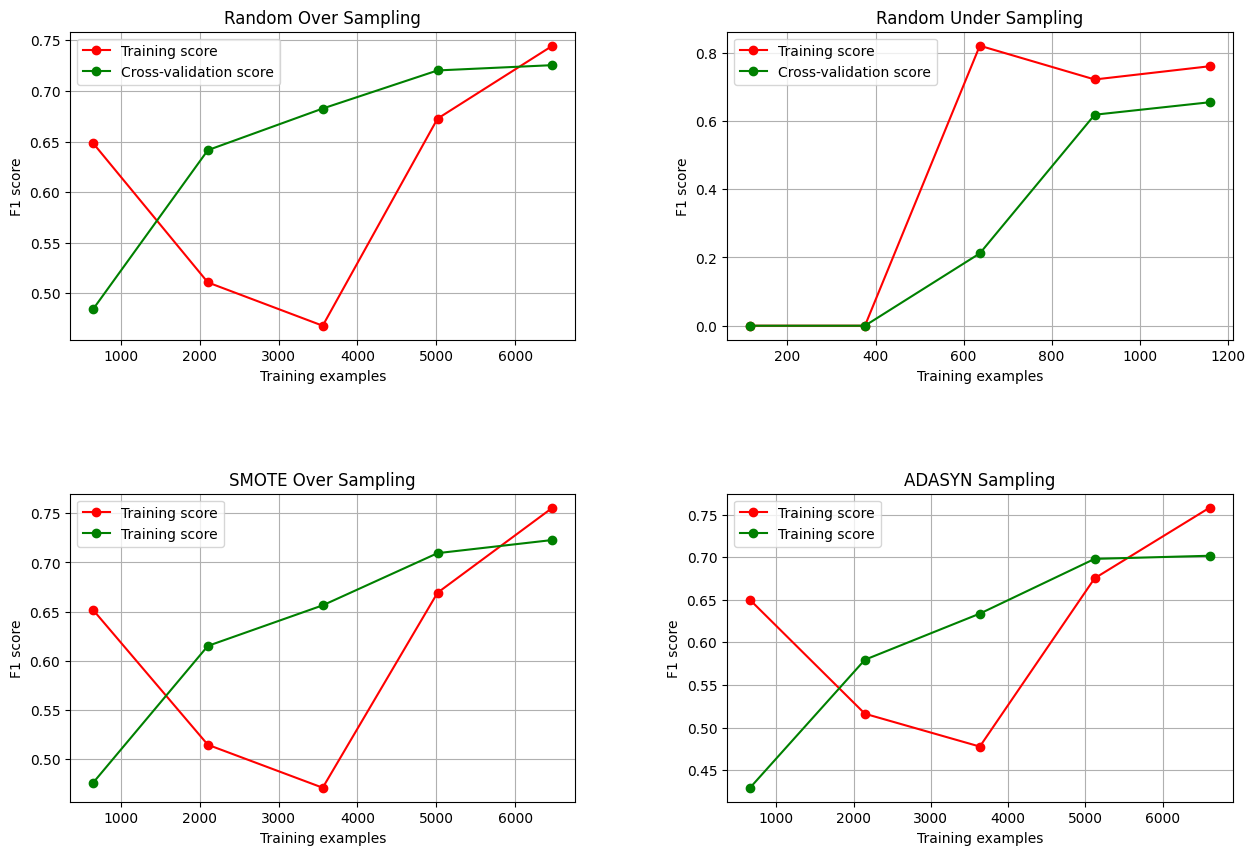

In [28]:
# {'preprocessor__imputer__n_neighbors': 14, 'clf__n_estimators': 200, 'clf__min_samples_split': 4, 
# 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__max_depth': 6, 'clf__class_weight': 'balanced'}
# The best split is 80-20


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 14)
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', RandomForestClassifier(n_estimators = 200,
                                   min_samples_split = 4,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 6,
                                   class_weight = "balanced"))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', RandomForestClassifier(n_estimators = 200,
                                   min_samples_split = 4,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 6,
                                   class_weight = "balanced"))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', RandomForestClassifier(n_estimators = 200,
                                   min_samples_split = 4,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 6,
                                   class_weight = "balanced"))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', RandomForestClassifier(n_estimators = 200,
                                   min_samples_split = 4,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 6,
                                   class_weight = "balanced"))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [30]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_adasyn, pipeline_adasyn.predict(X_test_adasyn)))  #*

# store the evaluation metrics 
y_pred1 = pipeline_adasyn.predict(X_test_adasyn)  #*
acc1 = accuracy_score(y_test_adasyn, y_pred1)        #*
prec1 = precision_score(y_test_adasyn,y_pred1)       #*
rec1 = recall_score(y_test_adasyn,y_pred1)           #*
F11 = f1_score(y_test_adasyn,y_pred1)                #*

Test F1 score for Random Over Sampling: 0.7201

Test F1 score for RandomUnderSampler: 0.7280 

Test F1 score for SMOTE over sampling: 0.7354 

Test F1 score for ADASYN over sampling: 0.7488
--------------------------------------------------------------------------------

Best F1 score is obtained with ADASYN:
F1 score: 0.7488

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       754
           1       0.72      0.78      0.75       715

    accuracy                           0.74      1469
   macro avg       0.75      0.75      0.74      1469
weighted avg       0.75      0.74      0.74      1469



### <u> 2. Perceptron

<div align="center"> TRAINING

---


Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.5949 

Training F1 score for Random Under Sampling:  0.6734 

Training F1 score for SMOTE over sampling: 0.5253 

Training F1 score for ADASYN over sampling: 0.5881 
----------------------------------------------------------------------------------------------------


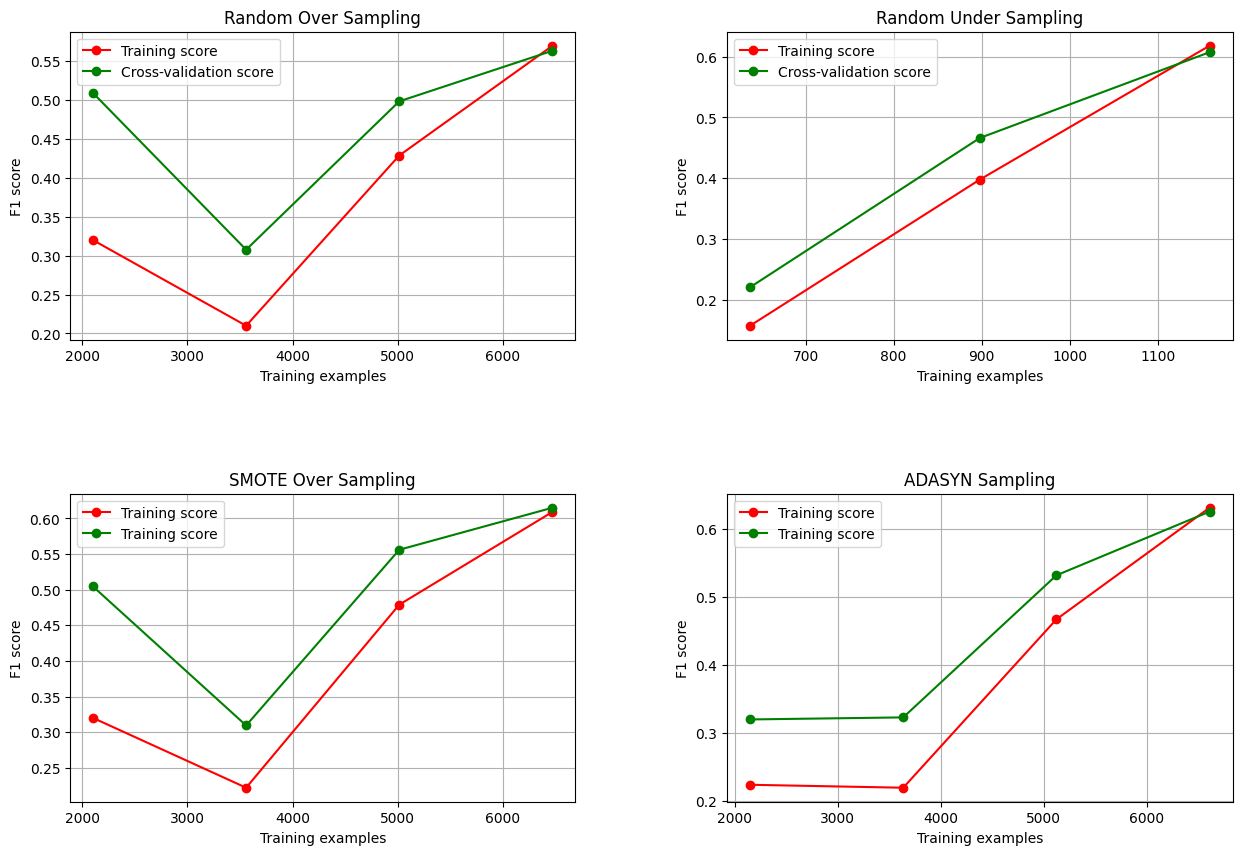

In [25]:
# Best hyperparameters: {'preprocessor__imputer__n_neighbors': 8, 'clf__max_iter': 1000, 'clf__alpha': 4.037017258596558e-05}
# The best split is 50-50 


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 8)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', Perceptron(max_iter = 1000,                            #*
                       alpha = 4.037017258596558e-05                       
))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', Perceptron(max_iter = 1000,                            #*
                       alpha = 4.037017258596558e-05                       
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', Perceptron(max_iter = 1000,                            #*
                       alpha = 4.037017258596558e-05                       
))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', Perceptron(max_iter = 1000,                            #*
                       alpha = 4.037017258596558e-05                       
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [14]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_smote, pipeline_smote.predict(X_test_smote)))

# store the evaluation metrics 
y_pred2 = pipeline_ros.predict(X_test_smote)
acc2 = accuracy_score(y_test_smote, y_pred2)
prec2 = precision_score(y_test_smote,y_pred2)
rec2 = recall_score(y_test_smote,y_pred2)
F12 = f1_score(y_test_smote,y_pred2)

Test F1 score for Random Over Sampling: 0.5543

Test F1 score for RandomUnderSampler: 0.6620 

Test F1 score for SMOTE over sampling: 0.6628 

Test F1 score for ADASYN over sampling: 0.5978
--------------------------------------------------------------------------------

Best F1 score is obtained with SMOTE Over Sampling:
F1 score: 0.6628

               precision    recall  f1-score   support

           0       0.67      0.54      0.60      1809
           1       0.61      0.73      0.66      1787

    accuracy                           0.63      3596
   macro avg       0.64      0.63      0.63      3596
weighted avg       0.64      0.63      0.63      3596



### <u> 3. Multinomial NB

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.5933 

Training F1 score for Random Under Sampling:  0.5726 

Training F1 score for SMOTE over sampling: 0.5863 

Training F1 score for ADASYN over sampling: 0.5554 
----------------------------------------------------------------------------------------------------


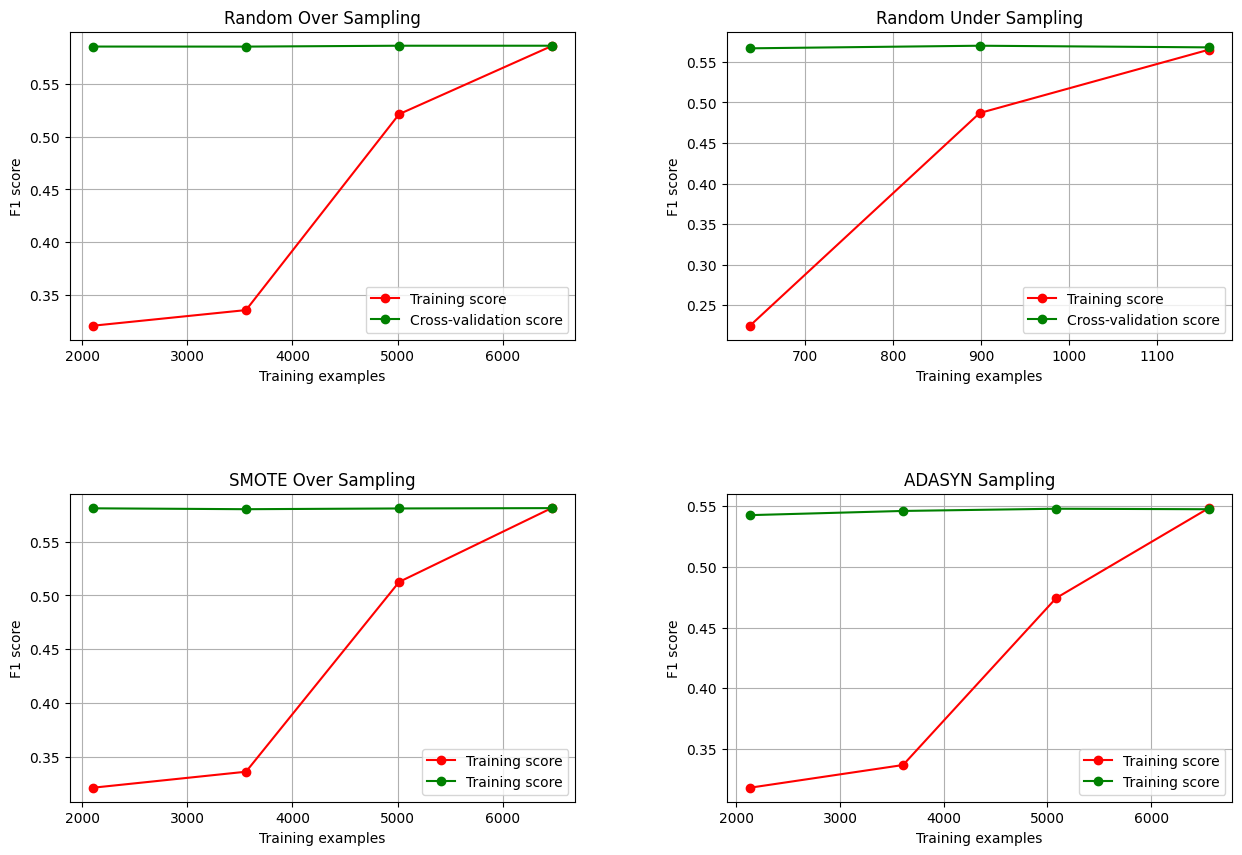

In [32]:
# {'preprocessor__imputer__n_neighbors': 12, 'clf__fit_prior': True, 'clf__class_prior': [0.5, 0.5], 'clf__alpha': 0.37}
# The best split is 80-20


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 12)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', MultinomialNB(fit_prior = True,
                          class_prior = [0.5,0.5],
                          alpha = .37
))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', MultinomialNB(fit_prior = True,
                          class_prior = [0.5,0.5],
                          alpha = .37
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', MultinomialNB(fit_prior = True,
                          class_prior = [0.5,0.5],
                          alpha = .37
))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', MultinomialNB(fit_prior = True,
                          class_prior = [0.5,0.5],
                          alpha = .37
))])

# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [37]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_smote, pipeline_smote.predict(X_test_smote)))

# store the evaluation metrics 
y_pred3 = pipeline_smote.predict(X_test_smote)
acc3 = accuracy_score(y_test_smote, y_pred3)
prec3 = precision_score(y_test_smote,y_pred3)
rec3 = recall_score(y_test_smote,y_pred3)
F13 = f1_score(y_test_smote,y_pred3)

Test F1 score for Random Over Sampling: 0.6545

Test F1 score for RandomUnderSampler: 0.6457 

Test F1 score for SMOTE over sampling: 0.6746 

Test F1 score for ADASYN over sampling: 0.6607
--------------------------------------------------------------------------------

Best F1 score is obtained with SMOTE Over Sampling:
F1 score: 0.6746

               precision    recall  f1-score   support

           0       0.68      0.65      0.67      1085
           1       0.66      0.69      0.67      1073

    accuracy                           0.67      2158
   macro avg       0.67      0.67      0.67      2158
weighted avg       0.67      0.67      0.67      2158



### <u> 4. Logistic Regression

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.6696 

Training F1 score for Random Under Sampling:  0.6886 

Training F1 score for SMOTE over sampling: 0.6807 

Training F1 score for ADASYN over sampling: 0.6684 
----------------------------------------------------------------------------------------------------


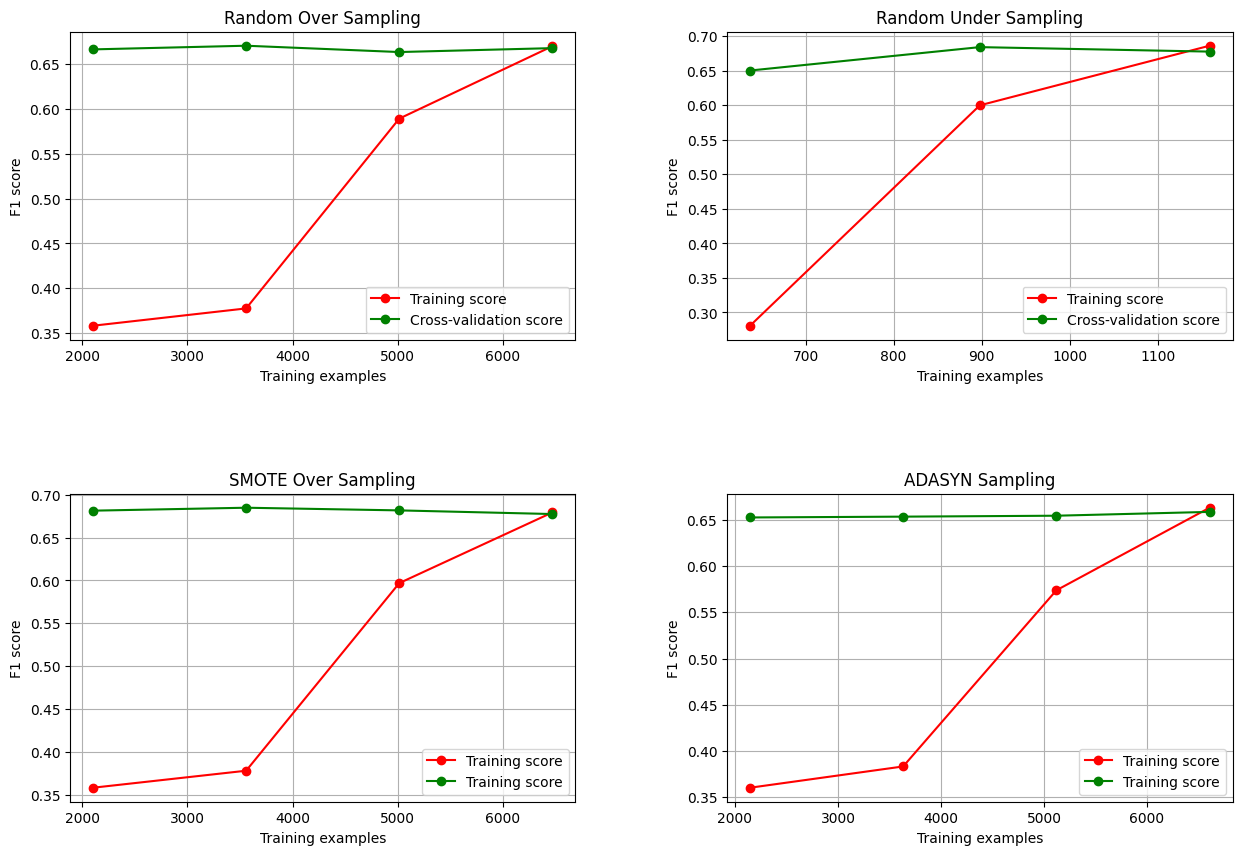

In [42]:
#{'preprocessor__imputer__n_neighbors': 16, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 0.20094005460822872}
# The best split is 70-30

# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 16)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', LogisticRegression(penalty = 'l2',
                                class_weight = 'balanced',
                                C = 0.20094005460822872
))])


# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', LogisticRegression(penalty = 'l2',
                                class_weight = 'balanced',
                                C = 0.20094005460822872
))])


# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', LogisticRegression(penalty = 'l2',
                                class_weight = 'balanced',
                                C = 0.20094005460822872
))])


# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', LogisticRegression(penalty = 'l2',
                                class_weight = 'balanced',
                                C = 0.20094005460822872
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [43]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_smote, pipeline_smote.predict(X_test_smote)))  #*

# store the evaluation metrics 
y_pred4 = pipeline_smote.predict(X_test_smote)  #*
acc4 = accuracy_score(y_test_smote, y_pred4)  #*
prec4 = precision_score(y_test_smote,y_pred4)  #*
rec4 = recall_score(y_test_smote,y_pred4)  #*
F14 = f1_score(y_test_smote,y_pred4)  #*

Test F1 score for Random Over Sampling: 0.6704

Test F1 score for RandomUnderSampler: 0.6685 

Test F1 score for SMOTE over sampling: 0.6798 

Test F1 score for ADASYN over sampling: 0.6515
--------------------------------------------------------------------------------

Best F1 score is obtained with SMOTE Over Sampling:
F1 score: 0.6798

               precision    recall  f1-score   support

           0       0.68      0.66      0.67      1085
           1       0.67      0.69      0.68      1073

    accuracy                           0.68      2158
   macro avg       0.68      0.68      0.68      2158
weighted avg       0.68      0.68      0.68      2158



### <u> 5. Linear Regression w/ Regularization

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.7036 

Training F1 score for Random Under Sampling:  0.7007 

Training F1 score for SMOTE over sampling: 0.6997 

Training F1 score for ADASYN over sampling: 0.6828 
----------------------------------------------------------------------------------------------------


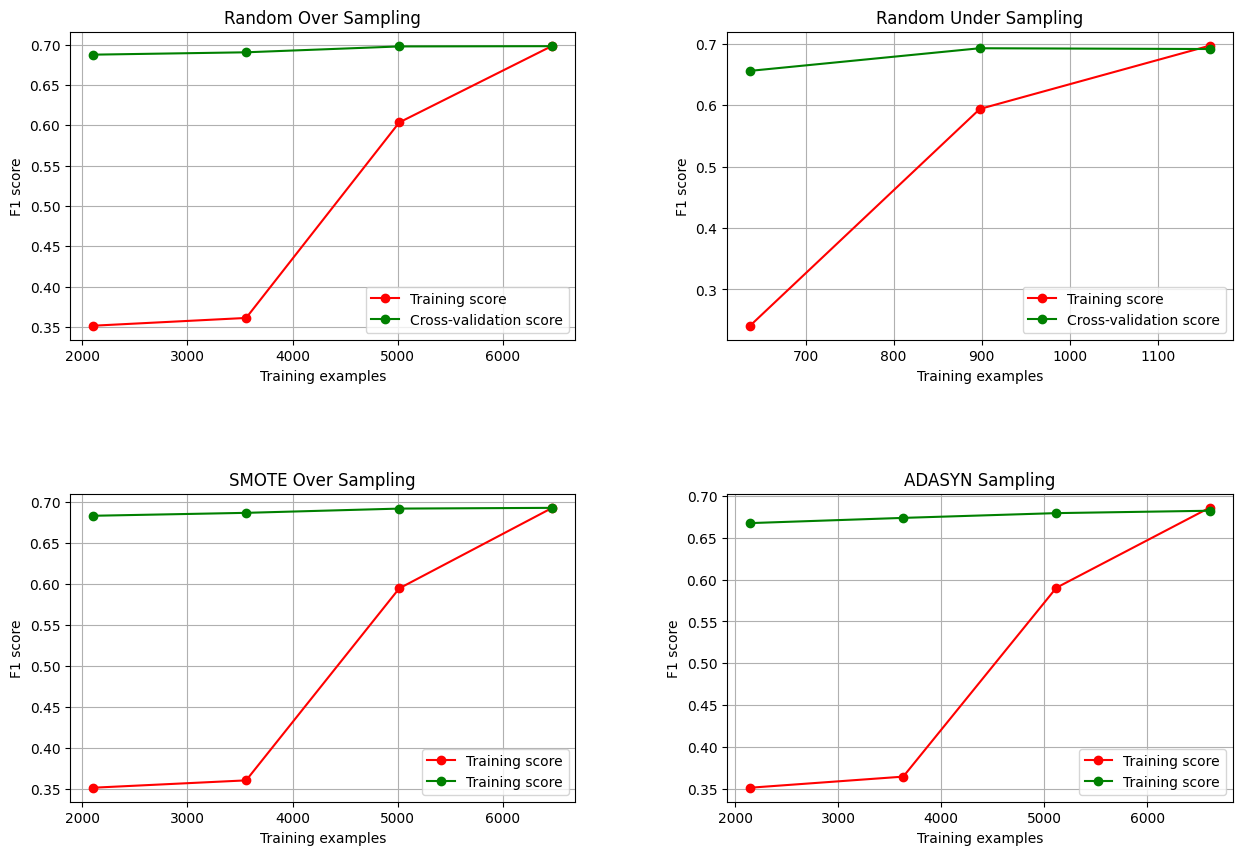

In [51]:
# {'preprocessor__imputer__n_neighbors': 5, 'clf__fit_intercept': False, 'clf__alpha': 1}
# The best split is 70-30

# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 5)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', RidgeClassifier(fit_intercept = False,
                            alpha = 1
))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', RidgeClassifier(fit_intercept = False,
                            alpha = 1
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf',RidgeClassifier(fit_intercept = False,
                            alpha = 1
))])
# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', RidgeClassifier(fit_intercept = False,
                            alpha = 1
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [53]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_adasyn, pipeline_adasyn.predict(X_test_adasyn)))  #*

# store the evaluation metrics 
y_pred5 = pipeline_adasyn.predict(X_test_adasyn)  #*
acc5 = accuracy_score(y_test_adasyn, y_pred5)  #*
prec5 = precision_score(y_test_adasyn,y_pred5)  #*
rec5 = recall_score(y_test_adasyn,y_pred5)  #*
F15 = f1_score(y_test_adasyn,y_pred5)  #*

Test F1 score for Random Over Sampling: 0.6871

Test F1 score for RandomUnderSampler: 0.6769 

Test F1 score for SMOTE over sampling: 0.6774 

Test F1 score for ADASYN over sampling: 0.6888
--------------------------------------------------------------------------------

Best F1 score is obtained with ADASYN:
F1 score: 0.6888

               precision    recall  f1-score   support

           0       0.69      0.54      0.60      1084
           1       0.63      0.76      0.69      1118

    accuracy                           0.65      2202
   macro avg       0.66      0.65      0.65      2202
weighted avg       0.66      0.65      0.65      2202



### <u> 6. SVM - linear kernel

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.6758 

Training F1 score for Random Under Sampling:  0.6837 

Training F1 score for SMOTE over sampling: 0.6785 

Training F1 score for ADASYN over sampling: 0.6768 
----------------------------------------------------------------------------------------------------


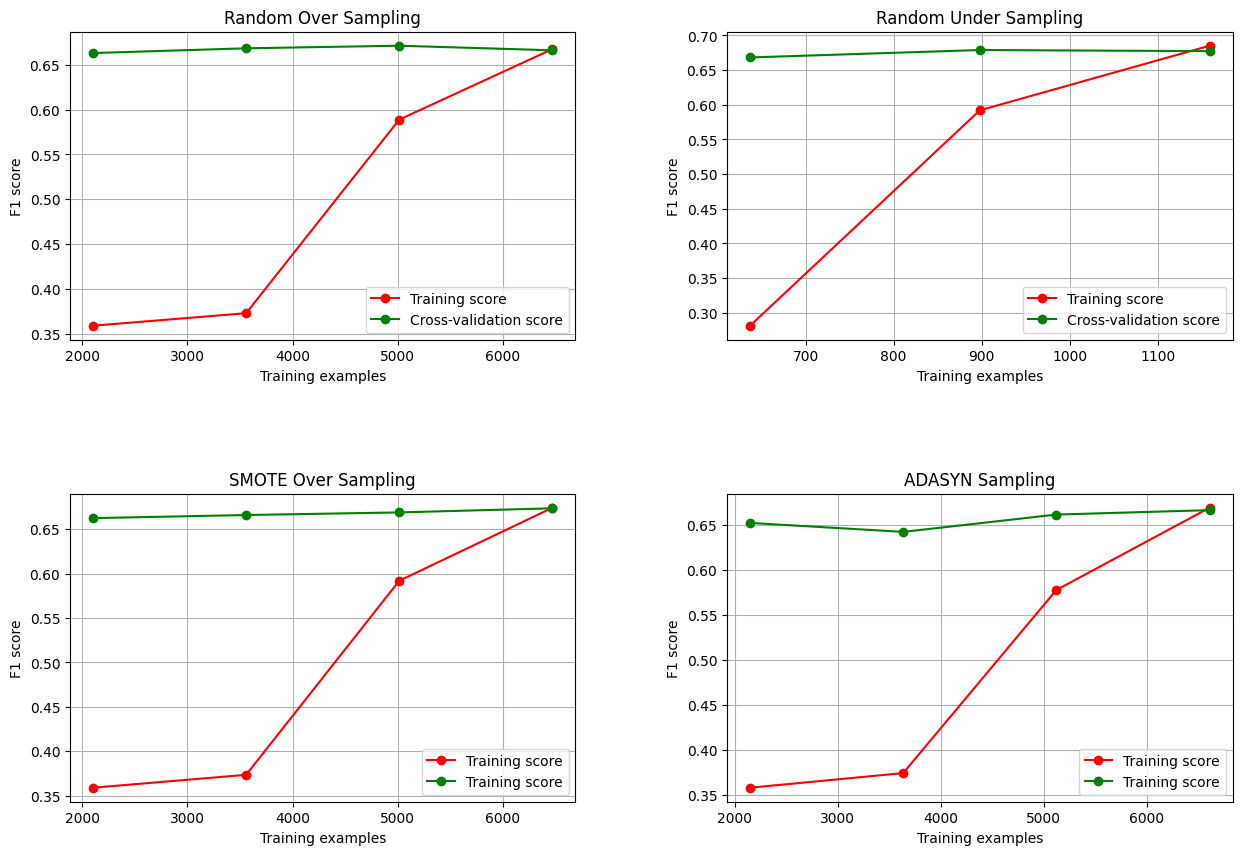

In [54]:
# {'preprocessor__imputer__n_neighbors': 4, 'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 10.0}
# best split: 50-50


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 4)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', SVC(kernel='linear', C=10, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', SVC(kernel='linear', C=10, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', SVC(kernel='linear', C=10, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', SVC(kernel='linear', C=10, gamma = 'scale', class_weight='balanced'))
    ])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [56]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_rus, pipeline_rus.predict(X_test_rus)))  #*

# store the evaluation metrics 
y_pred6 = pipeline_rus.predict(X_test_rus)  #*
acc6 = accuracy_score(y_test_rus, y_pred6)  #*
prec6 = precision_score(y_test_rus,y_pred6)  #*
rec6 = recall_score(y_test_rus,y_pred6)  #*
F16 = f1_score(y_test_rus,y_pred6)  #*

Test F1 score for Random Over Sampling: 0.6565

Test F1 score for RandomUnderSampler: 0.6785 

Test F1 score for SMOTE over sampling: 0.6705 

Test F1 score for ADASYN over sampling: 0.6621
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Under Sampling:
F1 score: 0.6785

               precision    recall  f1-score   support

           0       0.70      0.70      0.70       334
           1       0.68      0.68      0.68       310

    accuracy                           0.69       644
   macro avg       0.69      0.69      0.69       644
weighted avg       0.69      0.69      0.69       644



### <u> 7. SVM - RBF kernel

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.7024 

Training F1 score for Random Under Sampling:  0.7022 

Training F1 score for SMOTE over sampling: 0.6939 

Training F1 score for ADASYN over sampling: 0.6881 
----------------------------------------------------------------------------------------------------


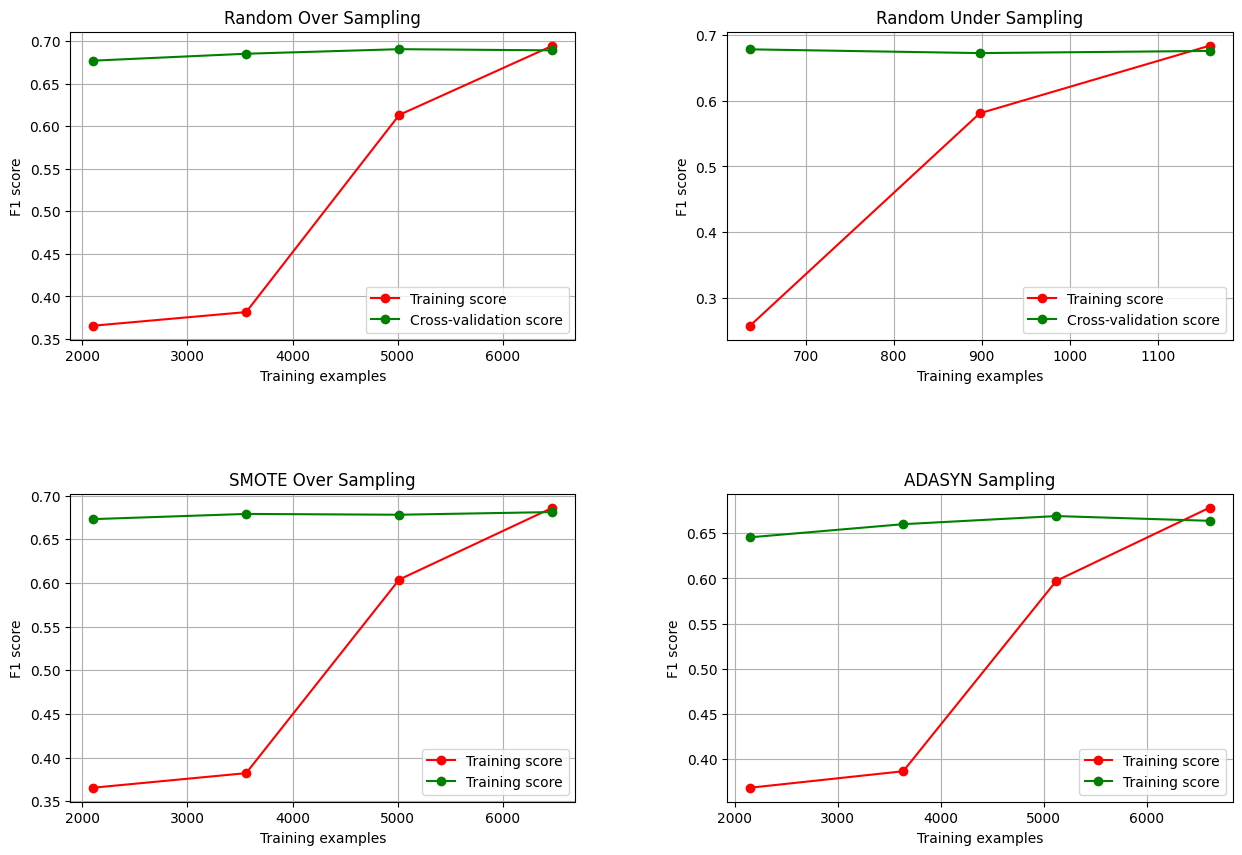

In [57]:
# {'preprocessor__imputer__n_neighbors': 10, 'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 0.1}
# The best split is 50-50 


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 10)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', SVC(kernel='rbf', C=0.1, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', SVC(kernel='rbf', C=0.1, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', SVC(kernel='rbf', C=0.1, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', SVC(kernel='rbf', C=0.1, gamma = 'scale', class_weight='balanced'))
    ])

# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [59]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_ros, pipeline_ros.predict(X_test_ros)))  #*

# store the evaluation metrics 
y_pred7 = pipeline_ros.predict(X_test_ros)  #*
acc7 = accuracy_score(y_test_ros, y_pred7)  #*
prec7 = precision_score(y_test_ros,y_pred7)  #*
rec7 = recall_score(y_test_ros,y_pred7)  #*
F17 = f1_score(y_test_ros,y_pred7)  #*

Test F1 score for Random Over Sampling: 0.6880

Test F1 score for RandomUnderSampler: 0.6707 

Test F1 score for SMOTE over sampling: 0.6760 

Test F1 score for ADASYN over sampling: 0.6691
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Over Sampling:
F1 score: 0.6880

               precision    recall  f1-score   support

           0       0.69      0.66      0.68      1809
           1       0.67      0.70      0.69      1787

    accuracy                           0.68      3596
   macro avg       0.68      0.68      0.68      3596
weighted avg       0.68      0.68      0.68      3596



### <u> 8. Gradient Boosting

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.9864 

Training F1 score for Random Under Sampling:  1.0000 

Training F1 score for SMOTE over sampling: 0.9775 

Training F1 score for ADASYN over sampling: 0.9457 
----------------------------------------------------------------------------------------------------


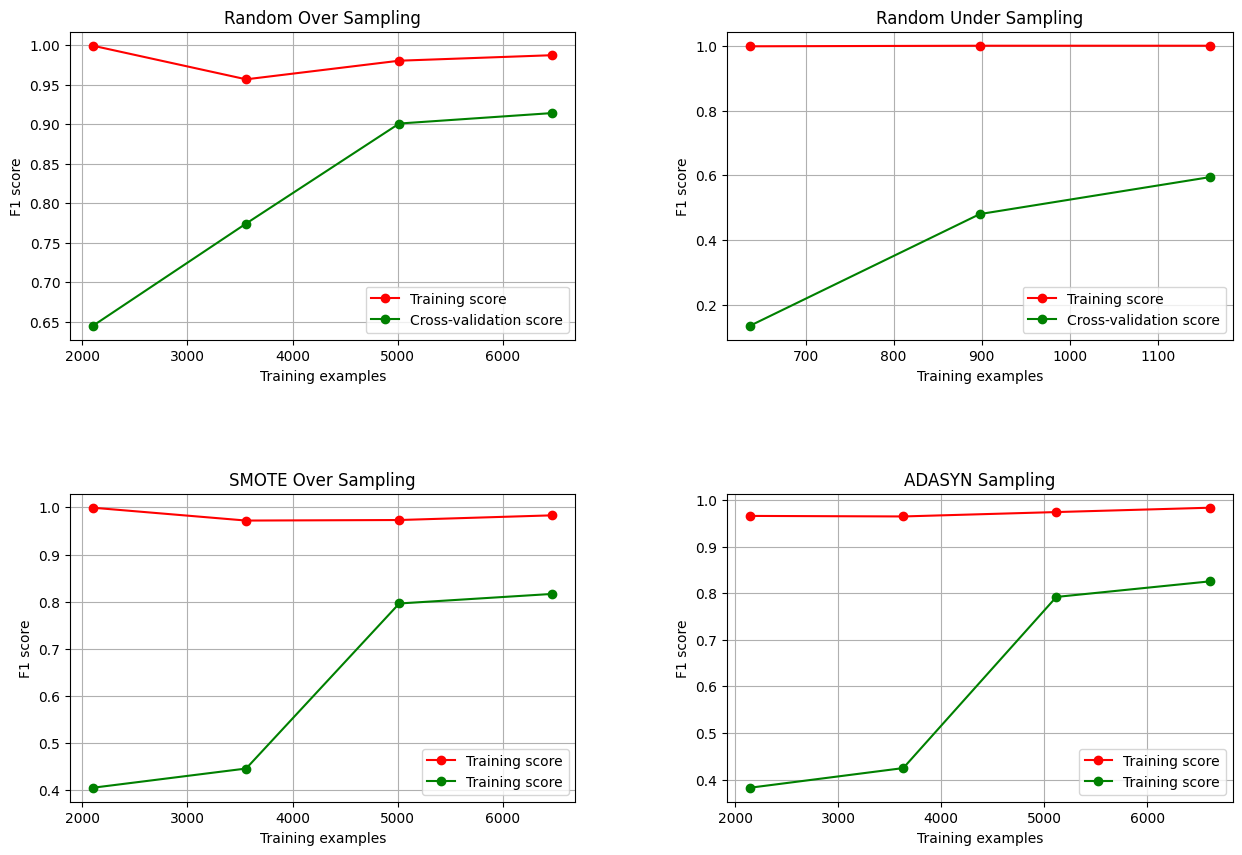

In [60]:
# {'preprocessor__imputer__n_neighbors': 14, 'clf__n_estimators': 200, 'clf__min_samples_split': 2, 
# 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': 3, 'clf__learning_rate': 1}
# The best split is 70-30


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 14)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = None,
                                       max_depth = 3,
                                       learning_rate = 1
                                    
))])
# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = None,
                                       max_depth = 3,
                                       learning_rate = 1
                                    
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = None,
                                       max_depth = 3,
                                       learning_rate = 1
                                    
))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = None,
                                       max_depth = 3,
                                       learning_rate = 1
                                    
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [62]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_rus, pipeline_rus.predict(X_test_rus)))  #*

# store the evaluation metrics 
y_pred8 = pipeline_rus.predict(X_test_rus)  #*
acc8 = accuracy_score(y_test_rus, y_pred8)  #*
prec8 = precision_score(y_test_rus,y_pred8)  #*
rec8 = recall_score(y_test_rus,y_pred8)  #*
F18 = f1_score(y_test_rus,y_pred8)  #*

Test F1 score for Random Over Sampling: 0.9862

Test F1 score for RandomUnderSampler: 1.0000 

Test F1 score for SMOTE over sampling: 0.9773 

Test F1 score for ADASYN over sampling: 0.9485
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Under Sampling:
F1 score: 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       181

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



### <u> 9. MLP

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.9778 

Training F1 score for Random Under Sampling:  0.9693 

Training F1 score for SMOTE over sampling: 0.9590 

Training F1 score for ADASYN over sampling: 0.9473 
----------------------------------------------------------------------------------------------------


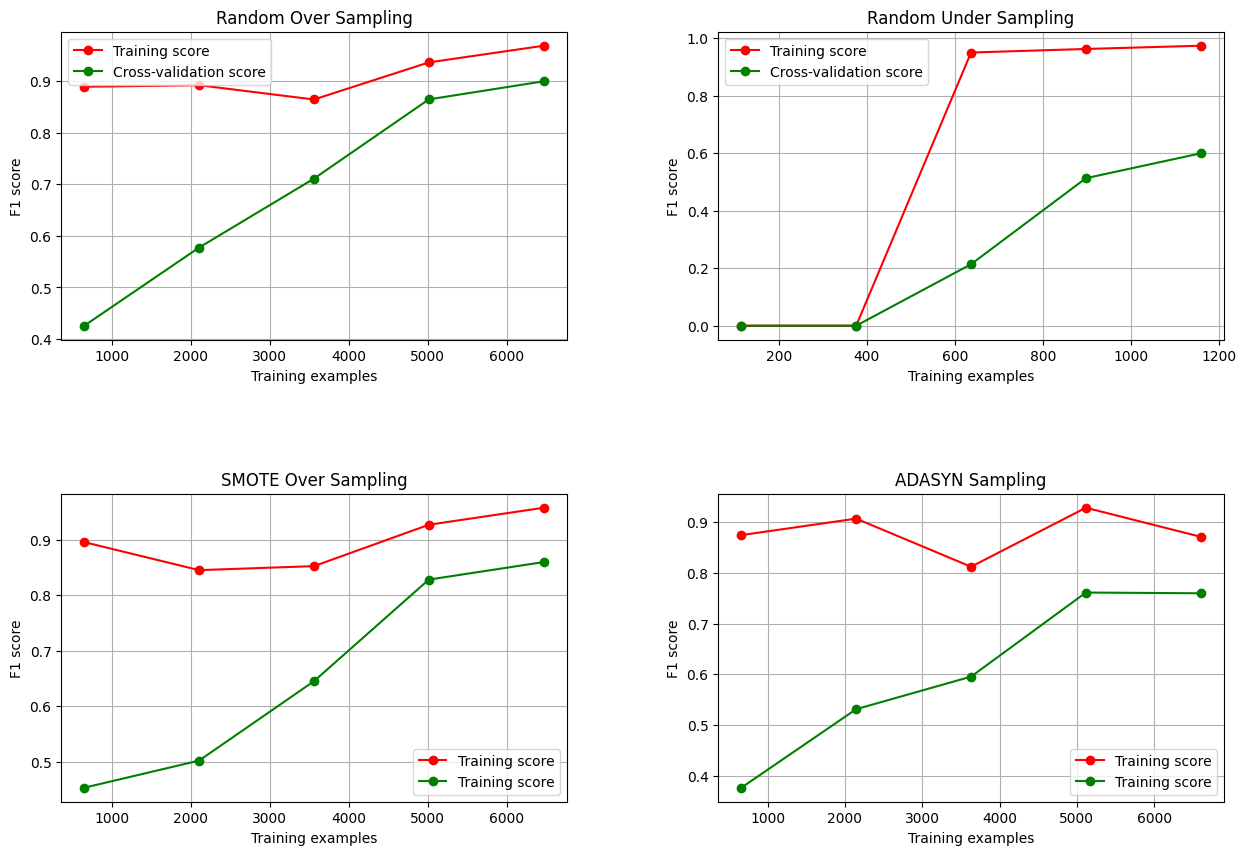

In [63]:
# {'preprocessor__imputer__n_neighbors': 3, 'clf__learning_rate_init': 0.01, 
#'clf__hidden_layer_sizes': (50, 50), 'clf__alpha': 0.001, 'clf__activation': 'relu'}
# best sample: 50-50


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 3)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', MLPClassifier(learning_rate_init = .01,
                hidden_layer_sizes = (50,50),
                alpha = .001,
                activation = 'relu'))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', MLPClassifier(learning_rate_init = .01,
                hidden_layer_sizes = (50,50),
                alpha = .001,
                activation = 'relu'))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', MLPClassifier(learning_rate_init = .01,
                hidden_layer_sizes = (50,50),
                alpha = .001,
                activation = 'relu'))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', MLPClassifier(learning_rate_init = .01,
                hidden_layer_sizes = (50,50),
                alpha = .001,
                activation = 'relu'))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [65]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_ros, pipeline_ros.predict(X_test_ros)))  #*

# store the evaluation metrics 
y_pred9 = pipeline_ros.predict(X_test_ros)  #*
acc9 = accuracy_score(y_test_ros, y_pred9)  #*
prec9 = precision_score(y_test_ros,y_pred9)  #*
rec9 = recall_score(y_test_ros,y_pred9)  #*
F19 = f1_score(y_test_ros,y_pred9)  #*

Test F1 score for Random Over Sampling: 0.9783

Test F1 score for RandomUnderSampler: 0.9669 

Test F1 score for SMOTE over sampling: 0.9631 

Test F1 score for ADASYN over sampling: 0.9540
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Over Sampling:
F1 score: 0.9783

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1809
           1       0.98      0.97      0.98      1787

    accuracy                           0.98      3596
   macro avg       0.98      0.98      0.98      3596
weighted avg       0.98      0.98      0.98      3596



### <u> 10. KNN

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 1.0000 

Training F1 score for Random Under Sampling:  1.0000 

Training F1 score for SMOTE over sampling: 1.0000 

Training F1 score for ADASYN over sampling: 1.0000 
----------------------------------------------------------------------------------------------------


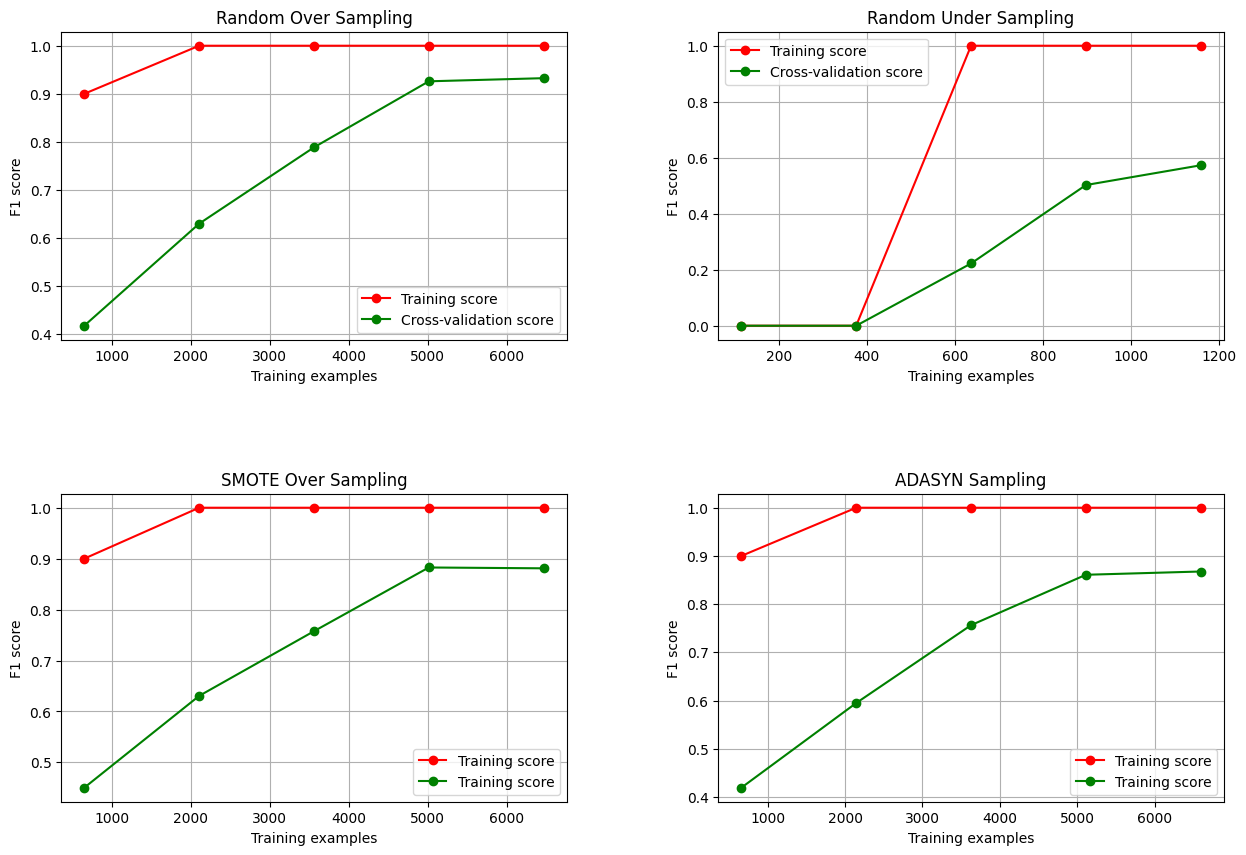

In [66]:
# {'preprocessor__imputer__n_neighbors': 2, 'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 1}
# The best split is 50-50


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 2)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', KNeighborsClassifier(weights = 'distance',
                                 p = 1,
                                 n_neighbors = 1)
)])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', KNeighborsClassifier(weights = 'distance',
                                 p = 1,
                                 n_neighbors = 1)
)])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', KNeighborsClassifier(weights = 'distance',
                                 p = 1,
                                 n_neighbors = 1)
)])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', KNeighborsClassifier(weights = 'distance',
                                 p = 1,
                                 n_neighbors = 1)
)])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [68]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_ros, pipeline_ros.predict(X_test_ros)))  #*

# store the evaluation metrics 
y_pred10 = pipeline_ros.predict(X_test_ros)  #*
acc10 = accuracy_score(y_test_ros, y_pred10)  #*
prec10 = precision_score(y_test_ros,y_pred10)  #*
rec10 = recall_score(y_test_ros,y_pred10)  #*
F110 = f1_score(y_test_ros,y_pred10)  #*

Test F1 score for Random Over Sampling: 1.0000

Test F1 score for RandomUnderSampler: 1.0000 

Test F1 score for SMOTE over sampling: 1.0000 

Test F1 score for ADASYN over sampling: 1.0000
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Over Sampling:
F1 score: 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1809
           1       1.00      1.00      1.00      1787

    accuracy                           1.00      3596
   macro avg       1.00      1.00      1.00      3596
weighted avg       1.00      1.00      1.00      3596



### <u> 11. AdaBoost

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 0.7256 

Training F1 score for Random Under Sampling:  0.7386 

Training F1 score for SMOTE over sampling: 0.7495 

Training F1 score for ADASYN over sampling: 0.7657 
----------------------------------------------------------------------------------------------------


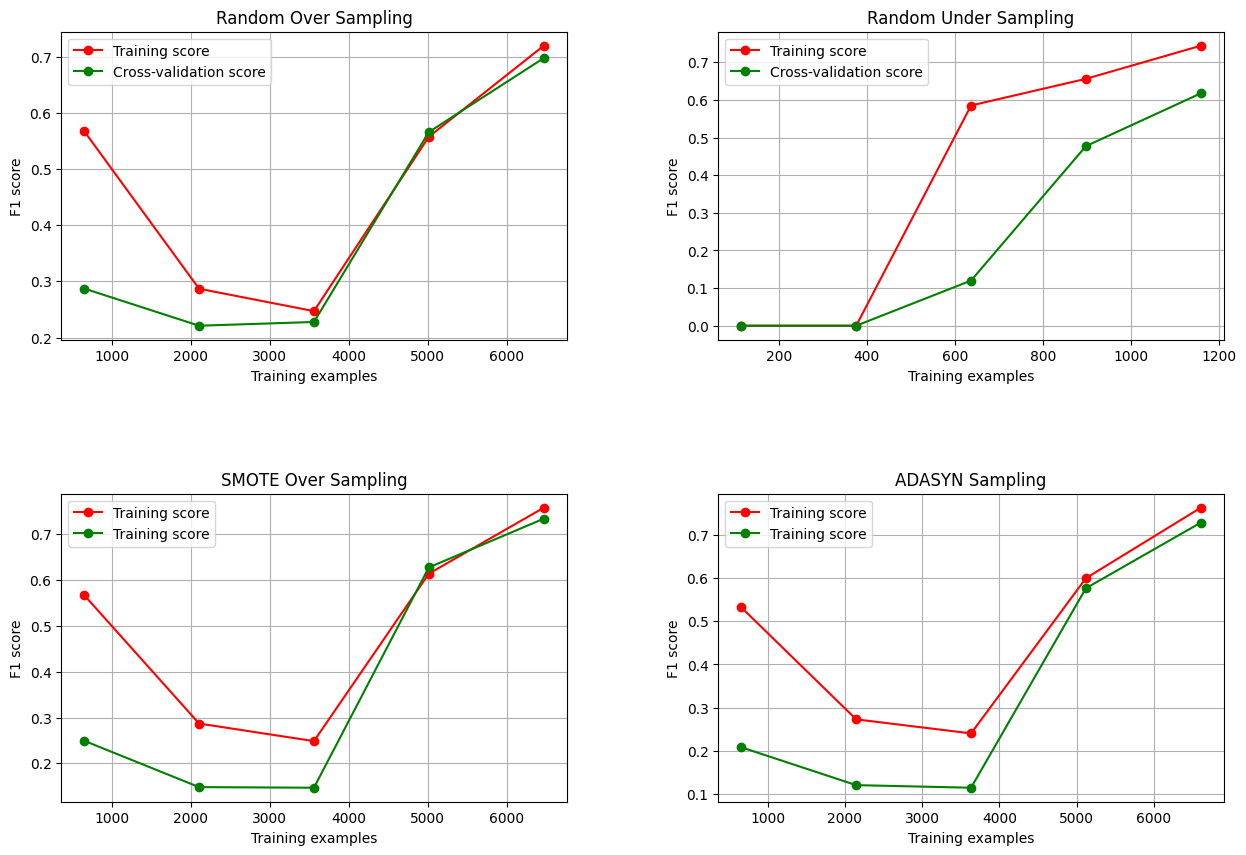

In [69]:
#{'preprocessor__imputer__n_neighbors': 10, 'clf__n_estimators': 200,
# 'clf__learning_rate': 1, 'clf__algorithm': 'SAMME.R'}
# The best split is 50-50 


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 10)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', AdaBoostClassifier(n_estimators = 200,
                               learning_rate = 1,
                               algorithm = 'SAMME.R'
))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.5, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', AdaBoostClassifier(n_estimators = 200,
                               learning_rate = 1,
                               algorithm = 'SAMME.R'
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.5, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', AdaBoostClassifier(n_estimators = 200,
                               learning_rate = 1,
                               algorithm = 'SAMME.R'
))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', AdaBoostClassifier(n_estimators = 200,
                               learning_rate = 1,
                               algorithm = 'SAMME.R'
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.5, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [71]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_smote, pipeline_smote.predict(X_test_smote)))  #*

# store the evaluation metrics 
y_pred11 = pipeline_smote.predict(X_test_smote)  #*
acc11 = accuracy_score(y_test_smote, y_pred11)  #*
prec11 = precision_score(y_test_smote,y_pred11)  #*
rec11 = recall_score(y_test_smote,y_pred11)  #*
F111 = f1_score(y_test_smote,y_pred11)  #*

Test F1 score for Random Over Sampling: 0.7107

Test F1 score for RandomUnderSampler: 0.7299 

Test F1 score for SMOTE over sampling: 0.7532 

Test F1 score for ADASYN over sampling: 0.7477
--------------------------------------------------------------------------------

Best F1 score is obtained with SMOTE Over Sampling:
F1 score: 0.7532

               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1809
           1       0.74      0.77      0.75      1787

    accuracy                           0.75      3596
   macro avg       0.75      0.75      0.75      3596
weighted avg       0.75      0.75      0.75      3596



### <u> 12. XBG

<div align="center"> TRAINING

---

Selected Features:  ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Training F1 score for Random Over Sampling: 1.0000 

Training F1 score for Random Under Sampling:  1.0000 

Training F1 score for SMOTE over sampling: 0.9998 

Training F1 score for ADASYN over sampling: 0.9994 
----------------------------------------------------------------------------------------------------


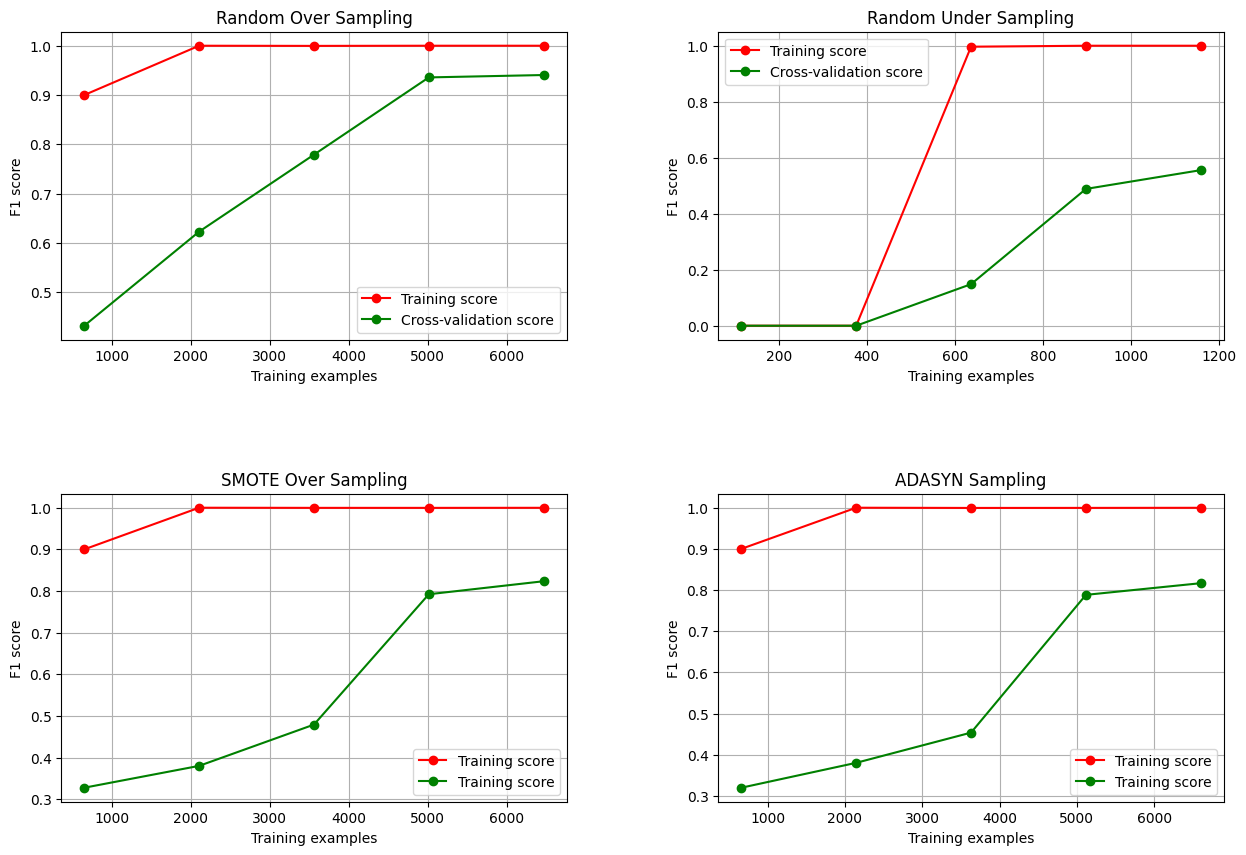

In [72]:
# {'preprocessor__imputer__n_neighbors': 1, 'clf__subsample': 0.5, 'clf__n_estimators': 200,
#  'clf__max_depth': 5, 'clf__learning_rate': 1, 'clf__colsample_bytree': 0.7}
# The best split is 70-30


# load the data
df = pd.read_csv('framingham.csv')

# separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# perform imputation using KNNImputer and random search to find the best n_neighbors
imputer = KNNImputer(n_neighbors = 1)                                                      #*
X_imputed = imputer.fit_transform(pd.DataFrame(X, columns=df.columns[:-1]))

# perform standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(imputer.transform(X))
X = pd.DataFrame(X, columns=df.columns[:-1])


# perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=10)
X_selected = feature_selector.fit_transform(X, y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features: ", selected_features.values.tolist())




# perform random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_selected, y)

# build pipeline and perform randomized search for random over sampling
pipeline_ros = Pipeline(steps=[('clf', XGBClassifier(subsample = 0.5,
                          n_estimators = 200,
                          max_depth = 5,
                          learning_rate = 1,
                          colsample_bytree = 0.7
))])

# fit pipeline on random over sampled data
pipeline_ros.fit(X_ros, y_ros)

# split the data into training and testing sets for random over sampling                            #*
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

y_pred_train_ros = pipeline_ros.predict(X_train_ros)
f1_train_ros = f1_score(y_train_ros, y_pred_train_ros)
print("\nTraining F1 score for Random Over Sampling: {:.4f} ".format(f1_train_ros))


# perform random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_selected, y)

# build pipeline for random under sampling
pipeline_rus = Pipeline(steps=[('clf', XGBClassifier(subsample = 0.5,
                          n_estimators = 200,
                          max_depth = 5,
                          learning_rate = 1,
                          colsample_bytree = 0.7
))])

# fit pipeline on random under sampled data
pipeline_rus.fit(X_rus, y_rus)


# split the data into training and testing sets for random under sampling                            #*
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

y_pred_train_rus = pipeline_rus.predict(X_train_rus)
f1_train_rus = f1_score(y_train_rus, y_pred_train_rus)
print("\nTraining F1 score for Random Under Sampling:  {:.4f} ".format(f1_train_rus))



# perform SMOTE over sampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_selected, y)

# build pipeline and perform randomized search for SMOTE over sampling
pipeline_smote = Pipeline(steps=[('clf', XGBClassifier(subsample = 0.5,
                          n_estimators = 200,
                          max_depth = 5,
                          learning_rate = 1,
                          colsample_bytree = 0.7
))])

# fit pipeline on SMOTE over sampled data
pipeline_smote.fit(X_smote, y_smote)

# split the data into training and testing sets for SMOTE over sampling                            #*
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

y_pred_train_smote = pipeline_smote.predict(X_train_smote)
f1_train_smote = f1_score(y_train_smote, y_pred_train_smote)
print("\nTraining F1 score for SMOTE over sampling: {:.4f} ".format(f1_train_smote))



# perform ADASYN over sampling
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_selected, y)

# build pipeline and perform randomized search for ADASYN over sampling
pipeline_adasyn = Pipeline(steps=[('clf', XGBClassifier(subsample = 0.5,
                          n_estimators = 200,
                          max_depth = 5,
                          learning_rate = 1,
                          colsample_bytree = 0.7
))])


# fit pipeline on ADASYN over sampled data
pipeline_adasyn.fit(X_adasyn, y_adasyn)

# split the data into training and testing sets for ADASYN over sampling                            #*
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=42)

y_pred_train_adasyn = pipeline_adasyn.predict(X_train_adasyn)
f1_train_adasyn = f1_score(y_train_adasyn, y_pred_train_adasyn)
print("\nTraining F1 score for ADASYN over sampling: {:.4f} ".format(f1_train_adasyn))

print("-"*100)
cv = 10
n_jobs = -1
train_sizes = np.linspace(.1, 1.0, 5)

# calculate the learning curve for random over sampling
train_sizes_ros, train_scores_ros, test_scores_ros = learning_curve(
    estimator=pipeline_ros, X=X_ros, y=y_ros, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for random under sampling
train_sizes_rus, train_scores_rus, test_scores_rus = learning_curve(
    estimator=pipeline_rus, X=X_rus, y=y_rus, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# calculate the learning curve for SMOTE over sampling
train_sizes_smote, train_scores_smote, test_scores_smote = learning_curve(
    estimator=pipeline_smote, X=X_smote, y=y_smote, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')


# calculate the learning curve for SMOTE over sampling
train_sizes_adasyn, train_scores_adasyn, test_scores_adasyn = learning_curve(
    estimator=pipeline_adasyn, X=X_adasyn, y=y_adasyn, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')

# plot the learning curves
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0, 0].set_title("Random Over Sampling")
ax[0, 0].set_xlabel("Training examples")
ax[0, 0].set_ylabel("F1 score")
ax[0, 0].grid()
ax[0, 0].plot(train_sizes_ros, np.mean(train_scores_ros, axis=1), 'o-', color="r", label="Training score")
ax[0, 0].plot(train_sizes_ros, np.mean(test_scores_ros, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 0].legend(loc="best")

ax[0, 1].set_title("Random Under Sampling")
ax[0, 1].set_xlabel("Training examples")
ax[0, 1].set_ylabel("F1 score")
ax[0, 1].grid()
ax[0, 1].plot(train_sizes_rus, np.mean(train_scores_rus, axis=1), 'o-', color="r", label="Training score")
ax[0, 1].plot(train_sizes_rus, np.mean(test_scores_rus, axis=1), 'o-', color="g", label="Cross-validation score")
ax[0, 1].legend(loc="best")

ax[1, 0].set_title("SMOTE Over Sampling")
ax[1, 0].set_xlabel("Training examples")
ax[1, 0].set_ylabel("F1 score")
ax[1, 0].grid()
ax[1, 0].plot(train_sizes_smote, np.mean(train_scores_smote, axis=1), 'o-', color="r", label="Training score")
ax[1, 0].plot(train_sizes_smote, np.mean(test_scores_smote, axis = 1), 'o-', color="g", label="Training score")
ax[1, 0].legend(loc="best")

ax[1, 1].set_title("ADASYN Sampling")
ax[1, 1].set_xlabel("Training examples")
ax[1, 1].set_ylabel("F1 score")
ax[1, 1].grid()
ax[1, 1].plot(train_sizes_adasyn, np.mean(train_scores_adasyn, axis=1), 'o-', color="r", label="Training score")
ax[1, 1].plot(train_sizes_adasyn, np.mean(test_scores_adasyn, axis = 1), 'o-', color="g", label="Training score")
ax[1, 1].legend(loc="best")



<div align="center"> EVALUATING

---




In [74]:
# evaluate the performance of the model on the test set for random over sampling
y_pred_ros = pipeline_ros.predict(X_test_ros)
f1_ros = f1_score(y_test_ros, y_pred_ros)
print("Test F1 score for Random Over Sampling: {:.4f}".format(f1_ros))

# evaluate the performance of the model on the test set for random under sampling
y_pred_rus = pipeline_rus.predict(X_test_rus)
f1_rus = f1_score(y_test_rus, y_pred_rus)
print("\nTest F1 score for RandomUnderSampler: {:.4f} ".format(f1_rus))

# evaluate the performance of the model on the test set for SMOTE over sampling
y_pred_smote = pipeline_smote.predict(X_test_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)
print("\nTest F1 score for SMOTE over sampling: {:.4f} ".format(f1_smote))

# evaluate the performance of the model on the test set for ADASYN over sampling
y_pred_adasyn = pipeline_adasyn.predict(X_test_adasyn)
f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
print("\nTest F1 score for ADASYN over sampling: {:.4f}".format(f1_adasyn))

# Create a dictionary that contains the F1 scores for all the sampling methods
f1_scores = {'Random Over Sampling': f1_ros, 'Random Under Sampling': f1_rus, 'SMOTE Over Sampling': f1_smote, 'ADASYN':f1_adasyn}

# Find the sampling method with the best F1 score
best_sampling_method = max(f1_scores, key=f1_scores.get)

# Print the best F1 score and classification report
print('-'*80)
print("\nBest F1 score is obtained with {}:".format(best_sampling_method))
print("F1 score: {:.4f}".format(f1_scores[best_sampling_method]))
print('\n',classification_report(y_test_ros, pipeline_ros.predict(X_test_ros)))  #*

# store the evaluation metrics 
y_pred12 = pipeline_ros.predict(X_test_ros)  #*
acc12 = accuracy_score(y_test_ros, y_pred12)  #*
prec12 = precision_score(y_test_ros,y_pred12)  #*
rec12 = recall_score(y_test_ros,y_pred12)  #*
F112 = f1_score(y_test_ros,y_pred12)  #*

Test F1 score for Random Over Sampling: 1.0000

Test F1 score for RandomUnderSampler: 1.0000 

Test F1 score for SMOTE over sampling: 1.0000 

Test F1 score for ADASYN over sampling: 1.0000
--------------------------------------------------------------------------------

Best F1 score is obtained with Random Over Sampling:
F1 score: 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00      1073

    accuracy                           1.00      2158
   macro avg       1.00      1.00      1.00      2158
weighted avg       1.00      1.00      1.00      2158



## Model Tabels

In [76]:
# evaluation metrics

results_df = pd.DataFrame({'Model': ['Random Forest', 'Perceptron','Naive Bayes', 'Logistic Regression',
                                     'Linear Regression','SVM - Linear','SVM - RB','Gradient Boosting',
                                     'MLP','KNN','AdaBoost','XBG'],
                           'Accuracy': [acc1, acc2, acc3,acc4, acc5, acc6, acc7, acc8,acc9,acc10,acc11,acc12],
                           'Recall':[rec1, rec2, rec3,rec4,rec5,rec6,rec7,rec8,rec9,rec10,rec11,rec12],
                           'Precision':[prec1, prec2, prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12],
                           'F1':[F11,F12,F13,F14,F15,F16,F17,F18,F19,F110,F111,F112]
                           })

print(results_df)

                  Model  Accuracy    Recall  Precision        F1
0         Random Forest  0.744724  0.781818   0.718509  0.748828
1            Perceptron  0.592881  0.505876   0.608754  0.552567
2           Naive Bayes  0.670065  0.687791   0.661883  0.674589
3   Logistic Regression  0.676552  0.690587   0.669377  0.679817
4     Linear Regression  0.651226  0.760286   0.629630  0.688817
5          SVM - Linear  0.690994  0.677419   0.679612  0.678514
6              SVM - RB  0.682981  0.703414   0.673273  0.688013
7     Gradient Boosting  1.000000  1.000000   1.000000  1.000000
8                   MLP  0.978587  0.973139   0.983597  0.978340
9                   KNN  1.000000  1.000000   1.000000  1.000000
10             AdaBoost  0.750556  0.766088   0.740801  0.753232
11                  XBG  1.000000  1.000000   1.000000  1.000000


In [79]:
# sorted metrics

f1_df = results_df.sort_values('F1', ascending=False).reset_index(drop=True)

print(f1_df.to_string(index=False))

              Model  Accuracy   Recall  Precision       F1
  Gradient Boosting  1.000000 1.000000   1.000000 1.000000
                KNN  1.000000 1.000000   1.000000 1.000000
                XBG  1.000000 1.000000   1.000000 1.000000
                MLP  0.978587 0.973139   0.983597 0.978340
           AdaBoost  0.750556 0.766088   0.740801 0.753232
      Random Forest  0.744724 0.781818   0.718509 0.748828
  Linear Regression  0.651226 0.760286   0.629630 0.688817
           SVM - RB  0.682981 0.703414   0.673273 0.688013
Logistic Regression  0.676552 0.690587   0.669377 0.679817
       SVM - Linear  0.690994 0.677419   0.679612 0.678514
        Naive Bayes  0.670065 0.687791   0.661883 0.674589
         Perceptron  0.592881 0.505876   0.608754 0.552567
